In [8]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Rescaling
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
train_dir = '/kaggle/input/100-bird-species/train'
test_dir = '/kaggle/input/100-bird-species/test'
val_dir = '/kaggle/input/100-bird-species/valid'

In [18]:
img_size=224
batch_size=32

train_data = image_dataset_from_directory(train_dir,
                                        image_size = (img_size,img_size),
                                        batch_size = batch_size,
                                        shuffle = True)
val_data = image_dataset_from_directory(val_dir,
                                        image_size = (img_size,img_size),
                                        batch_size = batch_size,
                                        shuffle = False)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [5]:
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

img_size = 224
batch_size = 32

# Load datasets without additional preprocessing since we'll include it in the model
train_data = image_dataset_from_directory(
    train_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True
)

val_data = image_dataset_from_directory(
    val_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False
)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [6]:
model = Sequential([
    # Preprocessing Layer for ResNet50
    tf.keras.layers.Lambda(preprocess_input, input_shape=(img_size, img_size, 3)),
    
    # Include ResNet50 as the base model
    ResNet50(include_top=False, pooling='avg', weights='imagenet'),
    
    # Additional layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(525, activation='softmax')  # Updated to 525 classes
])

In [9]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    verbose=1  # Progress bar and detailed information
)

Epoch 1/20
2645/2645 [==============================] - 486s 170ms/step - loss: 2.1479 - accuracy: 0.5623 - val_loss: 0.4124 - val_accuracy: 0.8979
Epoch 2/20
2645/2645 [==============================] - 451s 171ms/step - loss: 0.5601 - accuracy: 0.8606 - val_loss: 0.2883 - val_accuracy: 0.9250
Epoch 3/20
2645/2645 [==============================] - 449s 170ms/step - loss: 0.3342 - accuracy: 0.9131 - val_loss: 0.2575 - val_accuracy: 0.9387
Epoch 4/20
2645/2645 [==============================] - 449s 170ms/step - loss: 0.2291 - accuracy: 0.9376 - val_loss: 0.2201 - val_accuracy: 0.9432
Epoch 5/20
2645/2645 [==============================] - 449s 170ms/step - loss: 0.1790 - accuracy: 0.9503 - val_loss: 0.2371 - val_accuracy: 0.9429
Epoch 6/20
2645/2645 [==============================] - 449s 170ms/step - loss: 0.1456 - accuracy: 0.9585 - val_loss: 0.2162 - val_accuracy: 0.9440
Epoch 7/20
2645/2645 [==============================] - 449s 170ms/step - loss: 0.1238 - accuracy: 0.9646 - val_

In [11]:
test_data = image_dataset_from_directory(test_dir,
                                         image_size=(img_size, img_size),
                                         batch_size=batch_size,
                                         shuffle=False)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 2625 files belonging to 525 classes.
83/83 [==============================] - 5s 59ms/step - loss: 0.1108 - accuracy: 0.9710
Test Loss: 0.11083292961120605
Test Accuracy: 0.9710476398468018


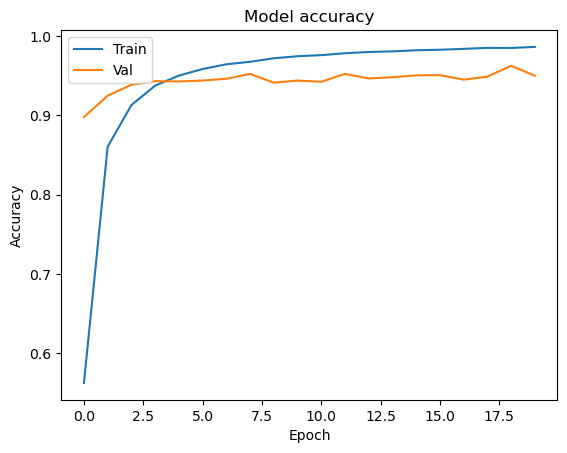

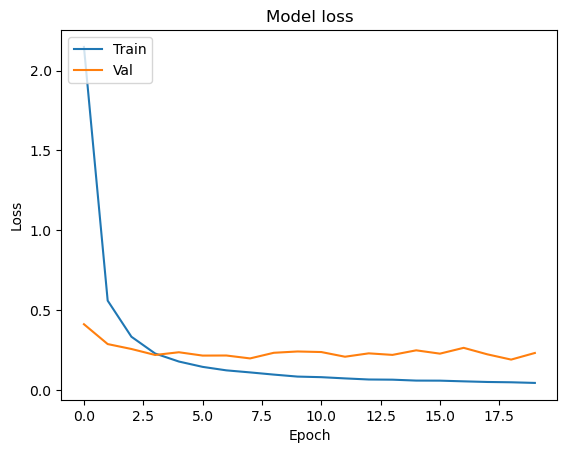

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 37ms/step


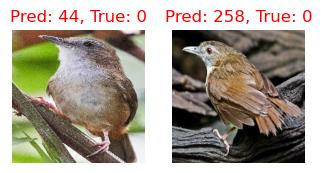

1/1 [==============================] - 0s 37ms/step


<Figure size 1000x1000 with 0 Axes>

1/1 [==============================] - 0s 37ms/step


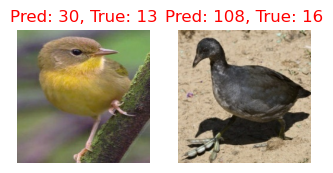

1/1 [==============================] - 0s 44ms/step


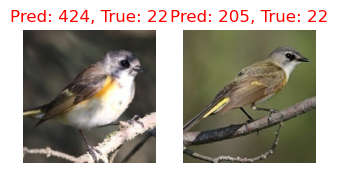

1/1 [==============================] - 0s 41ms/step


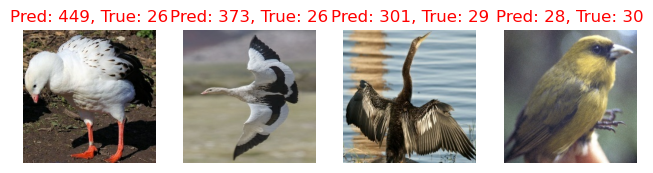

1/1 [==============================] - 0s 50ms/step


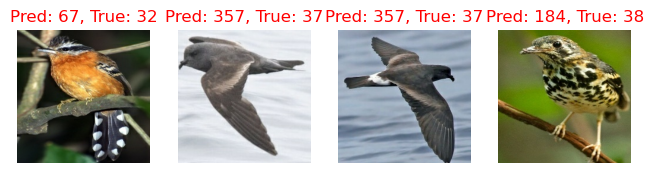

1/1 [==============================] - 0s 45ms/step


<Figure size 1000x1000 with 0 Axes>

1/1 [==============================] - 0s 36ms/step


<Figure size 1000x1000 with 0 Axes>

1/1 [==============================] - 0s 42ms/step


<Figure size 1000x1000 with 0 Axes>

1/1 [==============================] - 0s 39ms/step


<Figure size 1000x1000 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].astype("uint8"))  # images are already numpy arrays
        plt.title(f"Pred: {predictions[i]}, True: {labels[i]}", color=("green" if predictions[i] == labels[i] else "red"))
        plt.axis("off")
    plt.show()

# Get the images and labels from the test set (assuming test_data is already batched)
for images, labels in test_data.take(10):  # Adjust the number taken if you need more examples
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Find misclassified
    misclassified_indices = np.where(predicted_labels != labels.numpy())[0]  # Ensure labels are also numpy arrays if not, remove `.numpy()`
    misclassified_images = images.numpy()[misclassified_indices] if hasattr(images, 'numpy') else images[misclassified_indices]  # Check if images need conversion
    misclassified_labels = labels.numpy()[misclassified_indices] if hasattr(labels, 'numpy') else labels[misclassified_indices]
    predicted_labels = predicted_labels[misclassified_indices]

    # Plot misclassified images
    plot_images(misclassified_images, misclassified_labels, predicted_labels)


In [15]:
def print_misclassified_details(images, labels, predictions):
    # Collecting misclassified image details
    misclassified_info = []
    for i in range(len(images)):
        if predictions[i] != labels[i]:
            misclassified_info.append((i, predictions[i], labels[i]))

    # Printing the details
    if misclassified_info:
        print("Misclassified Images Details:")
        for info in misclassified_info:
            index, predicted, true = info
            print(f"Index: {index}, Predicted: {predicted}, True: {true}")
    else:
        print("No misclassified images found.")

# Assuming 'test_data' is your dataset and it batches multiple images per batch
for images, labels in test_data.take(10):  # Adjust the number taken if you need more examples
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Labels might need conversion from tensors to numpy arrays, depending on your setup
    actual_labels = labels.numpy() if hasattr(labels, 'numpy') else labels
    misclassified_images = images.numpy() if hasattr(images, 'numpy') else images

    # Print misclassified image details
    print_misclassified_details(misclassified_images, actual_labels, predicted_labels)


1/1 [==============================] - 0s 36ms/step
Misclassified Images Details:
Index: 1, Predicted: 44, True: 0
Index: 3, Predicted: 258, True: 0
1/1 [==============================] - 0s 36ms/step
No misclassified images found.
1/1 [==============================] - 0s 41ms/step
Misclassified Images Details:
Index: 4, Predicted: 30, True: 13
Index: 19, Predicted: 108, True: 16
1/1 [==============================] - 0s 42ms/step
Misclassified Images Details:
Index: 16, Predicted: 424, True: 22
Index: 17, Predicted: 205, True: 22
1/1 [==============================] - 0s 36ms/step
Misclassified Images Details:
Index: 4, Predicted: 449, True: 26
Index: 6, Predicted: 373, True: 26
Index: 17, Predicted: 301, True: 29
Index: 25, Predicted: 28, True: 30
1/1 [==============================] - 0s 42ms/step
Misclassified Images Details:
Index: 1, Predicted: 67, True: 32
Index: 28, Predicted: 357, True: 37
Index: 29, Predicted: 357, True: 37
Index: 31, Predicted: 184, True: 38
1/1 [==========

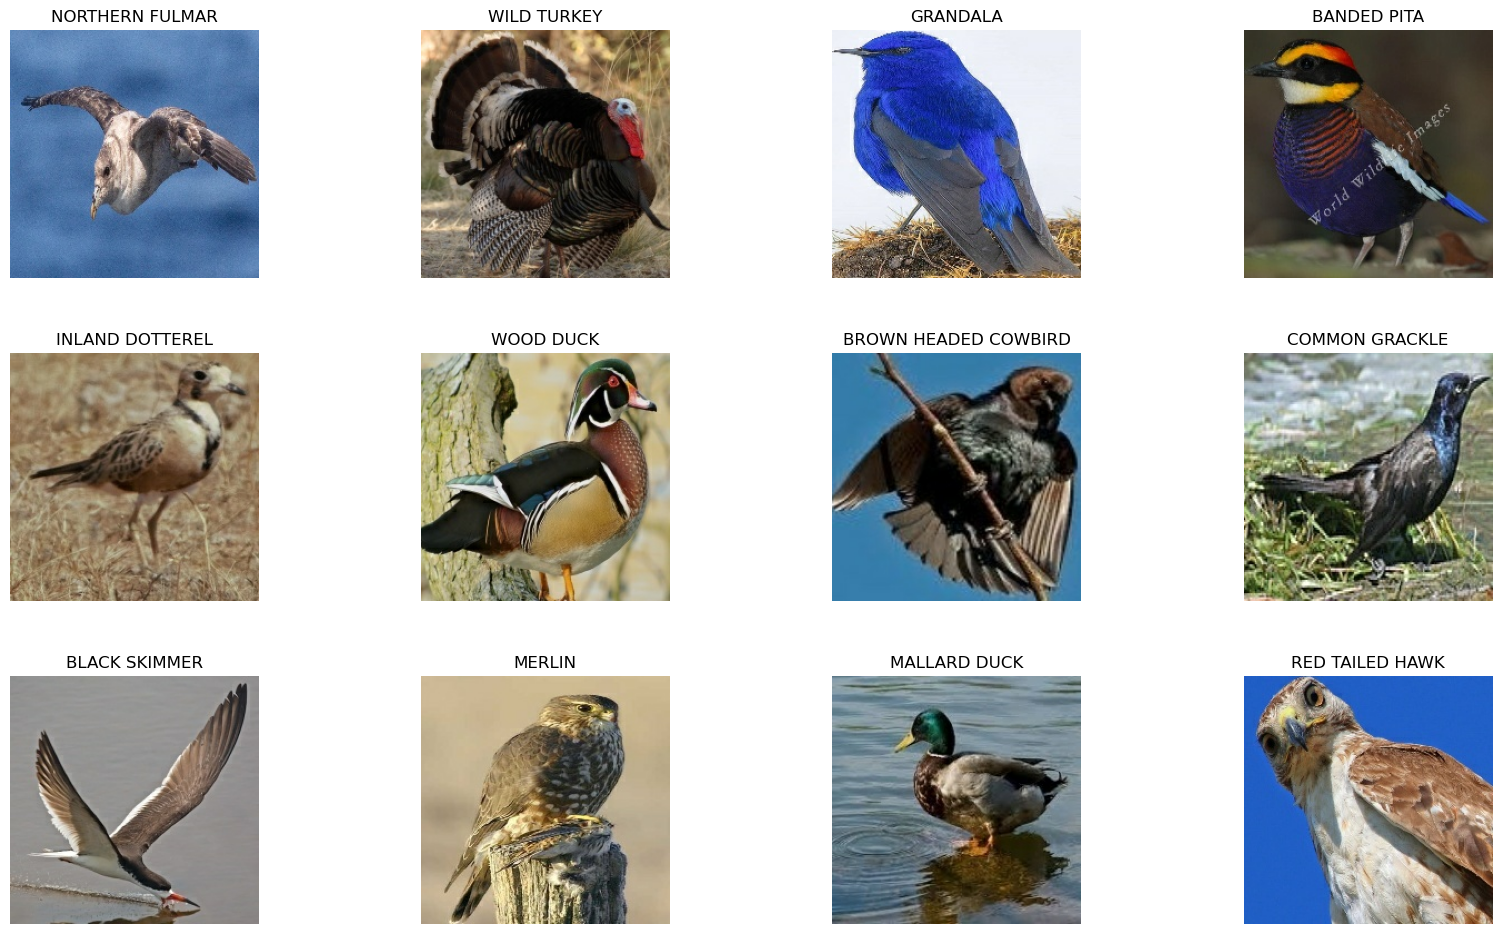

In [6]:
plt.figure(figsize=(20, 20))
# The take() method returns the specified rows from the DataFrame. The take() method needs the row positions, even if the rows has named indexes.
for images, labels in train_data.take(1):
  for i in range(12):
    ax = plt.subplot(5, 4, i + 1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i].numpy().astype("uint8"))
#     plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis("off")

## ResNet50 Model:

In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam


In [8]:
model = Sequential()
model.add(ResNet50(include_top=False,
                  pooling='avg',
                  input_shape=(img_size,img_size,3),
                  weights='imagenet',
                  classes=500))

94765736/94765736 [==============================] - 1s 0us/step


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


Model Loss:

Model Accuracy:

### Test Dataset Accuracy: